In [1]:
import matplotlib.pyplot as plt
import numpy as np
import qutip as qt
import scipy

# Test 5: Relevance of Different Hamiltonian Terms (Swap)

#cross terms, no cross terms = output 2nd excited state population state numbers to compare if theres difference, (start with perfect on resonance, start in ee)

In [2]:
from scipy.constants import hbar
π = np.pi
µs_to_ns = 1e3
norm_fact = 1/(np.sqrt(2))

### States
$|g\rangle=(1,0,0)^T$, $|e\rangle=(0,1,0)^T$, $|f\rangle=(0,0,1)^T$, $|r_0\rangle=(1,0)^T$, $|r_1\rangle=(0,1)^T$

### Creation/Annihilation Operators (q1, q2, resonator)
$b_1,b_1^\dagger, b_2, b_2^\dagger, c, c^\dagger.$ 

In [3]:
num_qubit_states =3
num_res_states = 2

g_state = qt.basis(num_qubit_states, 0)
e_state = qt.basis(num_qubit_states, 1)
f_state = qt.basis(num_qubit_states, 2)

r0_state = qt.basis(num_res_states, 0)
r1_state = qt.basis(num_res_states, 1)

In [4]:
b1 = qt.tensor(qt.destroy(num_qubit_states), qt.qeye(num_qubit_states), qt.qeye(num_res_states))
b1dag = b1.dag() 
b2 = qt.tensor(qt.qeye(num_qubit_states), qt.destroy(num_qubit_states), qt.qeye(num_res_states))
b2dag = b2.dag() 
c = qt.tensor(qt.qeye(num_qubit_states), qt.qeye(num_qubit_states), qt.destroy(num_res_states))
cdag = c.dag()

In [5]:
gg0_proj = qt.tensor(g_state, g_state, r0_state).proj()
ge0_proj = qt.tensor(g_state, e_state, r0_state).proj()
gf0_proj = qt.tensor(g_state, f_state, r0_state).proj()

eg0_proj = qt.tensor(e_state, g_state, r0_state).proj()
ee0_proj = qt.tensor(e_state, e_state, r0_state).proj()
ef0_proj = qt.tensor(e_state, f_state, r0_state).proj()

fg0_proj = qt.tensor(f_state, g_state, r0_state).proj()
fe0_proj = qt.tensor(f_state, e_state, r0_state).proj()
ff0_proj = qt.tensor(f_state, f_state, r0_state).proj()

gg1_proj = qt.tensor(g_state, g_state, r1_state).proj()
ge1_proj = qt.tensor(g_state, e_state, r1_state).proj()
gf1_proj = qt.tensor(g_state, f_state, r1_state).proj()

eg1_proj = qt.tensor(e_state, g_state, r1_state).proj()
ee1_proj = qt.tensor(e_state, e_state, r1_state).proj()
ef1_proj = qt.tensor(e_state, f_state, r1_state).proj()

fg1_proj = qt.tensor(f_state, g_state, r1_state).proj()
fe1_proj = qt.tensor(f_state, e_state, r1_state).proj()
ff1_proj = qt.tensor(f_state, f_state, r1_state).proj()

In [6]:
def plotresult(time_evolution_b):
    ge0_pops = qt.expect(ge0_proj, time_evolution_b.states)
    eg0_pops = qt.expect(eg0_proj, time_evolution_b.states)

    gf0_pops = qt.expect(gf0_proj, time_evolution_b.states)
    fg0_pops = qt.expect(fg0_proj, time_evolution_b.states)
    
    ef0_pops = qt.expect(ef0_proj, time_evolution_b.states)
    fe0_pops = qt.expect(fe0_proj, time_evolution_b.states)

    gg0_pops = qt.expect(gg0_proj, time_evolution_b.states)
    ee0_pops = qt.expect(ee0_proj, time_evolution_b.states)
    #ff0_pops = qt.expect(ff0_proj, time_evolution_b.states)
    
    ge1_pops = qt.expect(ge1_proj, time_evolution_b.states)
    eg1_pops = qt.expect(eg1_proj, time_evolution_b.states)

    gf1_pops = qt.expect(gf1_proj, time_evolution_b.states)
    fg1_pops = qt.expect(fg1_proj, time_evolution_b.states)
    
    ef1_pops = qt.expect(ef1_proj, time_evolution_b.states)
    fe1_pops = qt.expect(fe1_proj, time_evolution_b.states)

    gg1_pops = qt.expect(gg1_proj, time_evolution_b.states)
    ee1_pops = qt.expect(ee1_proj, time_evolution_b.states)
    #ff1_pops = qt.expect(ff1_proj, time_evolution_b.states)
    
    fig, ax = plt.subplots(tight_layout=True)
    ax.plot(t_vec * µs_to_ns, ge0_pops, label="ge0")
    ax.plot(t_vec * µs_to_ns, eg0_pops, label="eg0")
    ax.plot(t_vec * µs_to_ns, gf0_pops, label="gf0")
    ax.plot(t_vec * µs_to_ns, fg0_pops, label="fg0")
    #ax.plot(t_vec * µs_to_ns, gg0_pops, label="gg0")
    ax.plot(t_vec * µs_to_ns, ee0_pops, label="ee0")
    #ax.plot(t_vec * µs_to_ns, ff0_pops, label="ff0")
    
    ax.plot(t_vec * µs_to_ns, ge1_pops, label="ge1")
    ax.plot(t_vec * µs_to_ns, eg1_pops, label="eg1")
    ax.plot(t_vec * µs_to_ns, gf1_pops, label="gf1")
    ax.plot(t_vec * µs_to_ns, fg1_pops, label="fg1")
    #ax.plot(t_vec * µs_to_ns, gg1_pops, label="gg1")
    ax.plot(t_vec * µs_to_ns, ee1_pops, label="ee1")
    #ax.plot(t_vec * µs_to_ns, ff1_pops, label="ff1")

    ax.legend()
    ax.set_xlabel('Time, $t$ [ns]')
    ax.set_ylabel(r'Amplitude Squared, $P_{mn}$')
    ax.set_title('SWAP gate')

    plt.show()
    plt.close()

### Hamiltonian_cross
$H/\hbar = \sum_{i=1}^2{\left(\omega_i b_i^\dagger b_i + \frac{\alpha_i}{2} b_i^\dagger b_i^\dagger b_i b_i\right)} + (\omega_r+\chi_1 b_1^\dagger b_1+\chi_2 b_2^\dagger b_2)c^\dagger c + J(b_1^\dagger b_2+b_2^\dagger b_1+b_1^\dagger b_2^\dagger+b_1 b_2)$


### Hamiltonian_nocross
$H/\hbar = \sum_{i=1}^2{\left(\omega_i b_i^\dagger b_i + \frac{\alpha_i}{2} b_i^\dagger b_i^\dagger b_i b_i\right)} + (\omega_r+\chi_1 b_1^\dagger b_1+\chi_2 b_2^\dagger b_2)c^\dagger c + J(b_1^\dagger b_2+b_2^\dagger b_1)$

### Hamiltonian_nores
$H/\hbar = \sum_{i=1}^2{\left(\omega_i b_i^\dagger b_i + \frac{\alpha_i}{2} b_i^\dagger b_i^\dagger b_i b_i\right)} + J(b_1^\dagger b_2+b_2^\dagger b_1+b_1^\dagger b_2^\dagger+b_1 b_2)$


In [82]:
def hamiltonian_cross(omega_1, omega_2, omega_r, alpha_1, alpha_2, chi1, chi2, J_coupling):
    t1 = (omega_1 * b1dag * b1) + (omega_2 * b2dag * b2)
    t2 = (alpha_1 / 2 * b1dag * b1dag * b1 * b1) + (alpha_2 / 2 * b2dag * b2dag * b2 * b2)
    t3 = (omega_r + (chi1 * b1dag * b1) + (chi2 * b2dag * b2)) * cdag * c
    t4 = J_coupling * (b1dag * b2 + b2dag * b1)
    t5 = J_coupling * (b1dag * b2dag + b1 * b2)
    return t1 + t2 + t3 + t4 + t5

def hamiltonian_nocross(omega_1, omega_2, omega_r, alpha_1, alpha_2, chi1, chi2, J_coupling):
    t1 = (omega_1 * b1dag * b1) + (omega_2 * b2dag * b2)
    t2 = (alpha_1 / 2 * b1dag * b1dag * b1 * b1) + (alpha_2 / 2 * b2dag * b2dag * b2 * b2)
    t3 = (omega_r + (chi1 * b1dag * b1) + (chi2 * b2dag * b2)) * cdag * c
    t4 = J_coupling * (b1dag * b2 + b2dag * b1)
    return t1 + t2 + t3 + t4

def hamiltonian_nores(omega_1, omega_2, omega_r, alpha_1, alpha_2, chi1, chi2, J_coupling):
    t1 = (omega_1 * b1dag * b1) + (omega_2 * b2dag * b2)
    t2 = (alpha_1 / 2 * b1dag * b1dag * b1 * b1) + (alpha_2 / 2 * b2dag * b2dag * b2 * b2)
    t4 = J_coupling * (b1dag * b2 + b2dag * b1)
    t5 = J_coupling * (b1dag * b2dag + b1 * b2)
    return t1 + t2 + t4 + t5

In [115]:
def test(te1, te2, te3):
    ra1 = qt.expect(fg1_proj, te1.states)
    rb1 = qt.expect(fg1_proj, te2.states) 
    rc1 = qt.expect(fg1_proj, te3.states)

    ra2 = qt.expect(gf1_proj, te1.states)
    rb2 = qt.expect(gf1_proj, te2.states) 
    rc2 = qt.expect(gf1_proj, te3.states)

    ra3 = qt.expect(ee1_proj, te1.states)
    rb3 = qt.expect(ee1_proj, te2.states) 
    rc3 = qt.expect(ee1_proj, te3.states)
    
    ra4 = qt.expect(fg0_proj, te1.states)
    rb4 = qt.expect(fg0_proj, te2.states) 
    rc4 = qt.expect(fg0_proj, te3.states)

    ra5 = qt.expect(gf0_proj, te1.states)
    rb5 = qt.expect(gf0_proj, te2.states) 
    rc5 = qt.expect(gf0_proj, te3.states)

    ra6 = qt.expect(ee0_proj, te1.states)
    rb6 = qt.expect(ee0_proj, te2.states) 
    rc6 = qt.expect(ee0_proj, te3.states)
    
    ra7 = qt.expect(ge1_proj, te1.states)
    rb7 = qt.expect(ge1_proj, te2.states) 
    rc7 = qt.expect(ge1_proj, te3.states)
    

    print(ra1.all() == rb1.all() == rc1.all())
    print(ra2.all() == rb2.all() == rc2.all())
    print(ra3.all() == rb3.all() == rc3.all())
    print(ra4.all() == rb4.all() == rc4.all())
    print(ra5.all() == rb5.all() == rc5.all())
    print(ra6.all() == rb6.all() == rc6.all())
    print(ra7.all() == rb7.all() == rc7.all())
    
    print(ra1.all()==0, ra2.all()==0, ra3.all()==0, 
          ra4.all()==0, ra5.all()==0, ra6.all()==0,
          ra6.all()==0)
    
    #print(ra2)

In [119]:
t_start = 0
t_end = 3 * π / (2 * J_coupling)
t_vec = np.linspace(t_start, t_end, 601)

True
True
True
True
True
True
True
True True True True True True True


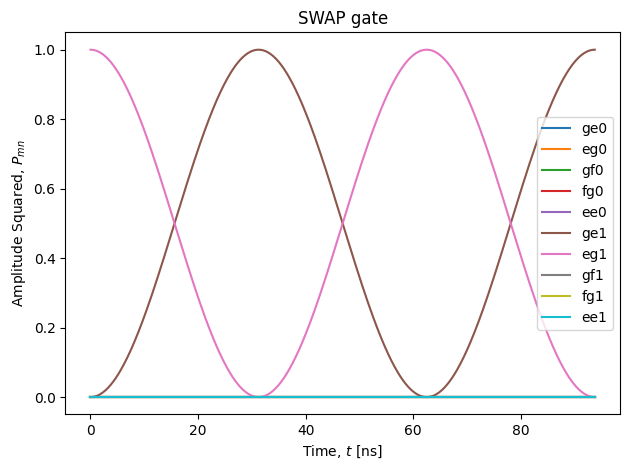

In [121]:
omega1 = 2*π * 6000
omega2 = 2*π * 6000
omegares = 2*π * 7000
J_coupling = 2*π * 8
alpha = 2*π * -300
chi = 2*π* 4 #(4mhz)

hcross = hamiltonian_cross(omega_1=omega1, omega_2=omega2, omega_r=omegares, alpha_1=alpha, 
                         alpha_2=alpha, chi1=chi, chi2=chi, J_coupling=J_coupling)
hnocross = hamiltonian_nocross(omega_1=omega1, omega_2=omega2, omega_r=omegares, alpha_1=alpha, 
                         alpha_2=alpha, chi1=chi, chi2=chi, J_coupling=J_coupling)
hnores = hamiltonian_nores(omega_1=omega1, omega_2=omega2, omega_r=omegares, alpha_1=alpha, 
                         alpha_2=alpha, chi1=chi, chi2=chi, J_coupling=J_coupling)

psi1 = qt.tensor(e_state, g_state, r1_state)

te1 = qt.mesolve(hcross, psi1, t_vec, [], [])
te2 = qt.mesolve(hnocross, psi1, t_vec, [], [])
te3 = qt.mesolve(hnores, psi1, t_vec, [], [])

test(te1, te2, te3)

plotresult(te1)

True
True
True
True
True
True
True
True True True True True True True


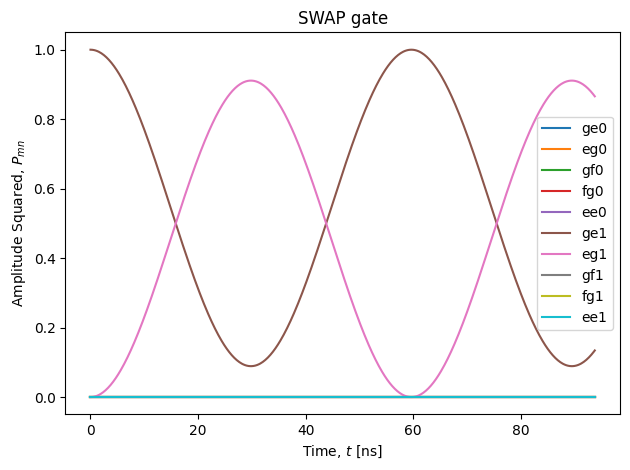

In [125]:
omega1 = 2*π * 6000
detuning = 5 # Mhz/2π
omega2 = omega1 - (2*π* detuning)
omegares = 2*π * 7000
J_coupling = 2*π * 8
alpha = 2*π * -300
chi = 2*π * 5000 #(4mhz)

hcross = hamiltonian_cross(omega_1=omega1, omega_2=omega2, omega_r=omegares, alpha_1=alpha, 
                         alpha_2=alpha, chi1=chi, chi2=chi, J_coupling=J_coupling)
hnocross = hamiltonian_nocross(omega_1=omega1, omega_2=omega2, omega_r=omegares, alpha_1=alpha, 
                         alpha_2=alpha, chi1=chi, chi2=chi, J_coupling=J_coupling)
hnores = hamiltonian_nores(omega_1=omega1, omega_2=omega2, omega_r=omegares, alpha_1=alpha, 
                         alpha_2=alpha, chi1=chi, chi2=chi, J_coupling=J_coupling)

psi1 = qt.tensor(g_state, e_state, r1_state)

te1 = qt.mesolve(hcross, psi1, t_vec, [], [])
te2 = qt.mesolve(hnocross, psi1, t_vec, [], [])
te3 = qt.mesolve(hnores, psi1, t_vec, [], [])

test(te1, te2, te3)

plotresult(te1)

I defined three different hamiltonians and time evolved them each with the same initial conditions and looked for the impact of including additional terms to the hamiltonian

I began with the perfectly on resonance case with an initial wave function of ge or eg performing excitation swaps. I observed 0 leakage and 0 difference between the expectation values of populations between different hamiltonians

I began to mess with the detuning, alpha values, chi values to encourage leakage events. I couldn't find any...